In [ ]:
!pip install pygmo

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.7/14.7 MB 24.1 MB/s eta 0:00:00


#### Зададим параметры, которые будем использовать в PyGMO
1. Размер популяции
2. Зерно рандомизации
3. Число повторений цикла эволюции

In [ ]:
pop_size = 100
current_seed = 66
number_of_evolutions = 10

In [ ]:
import pygmo
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

#### Определим функции из первой лабораторной так, чтобы их можно было использовать в PyGMO

In [ ]:
class BoothOptimization:
    def __init__(self,
                 x_min: float,
                 x_max: float,
                 y_min: float,
                 y_max: float):

        self.x_min = x_min
        self.x_max = x_max
        self.y_min = y_min
        self.y_max = y_max

    def get_bounds(self):
        return ([self.x_min, self.y_min], [self.x_max, self.y_max])

    def fitness(self, x: list[float]) -> list[float]:
        function_value = (x[0] + 2 * x[1] - 7) ** 2 + (2 * x[0] + x[1] - 5) ** 2
        return [function_value]

In [ ]:
class RosenbrockOptimization:
    def __init__(self,
                 x_min: float,
                 x_max: float,
                 y_min: float,
                 y_max: float):

        self.x_min = x_min
        self.x_max = x_max
        self.y_min = y_min
        self.y_max = y_max

    def get_bounds(self):
        return ([self.x_min, self.y_min], [self.x_max, self.y_max])

    def fitness(self, x: list[float]) -> list[float]:
        function_value = 100 * (x[1] - x[0] ** 2) ** 2 + (x[0] - 1) ** 2
        return [function_value]

In [ ]:
booth_function = pygmo.problem(BoothOptimization(-10, 10, -10, 10))

In [ ]:
rosenbrock_function = pygmo.problem(RosenbrockOptimization(-10, 10, -10, 10))

#### Определим решатель

In [ ]:
def few_evols(algo, pop, gens=10, number_of_evols=10):
    cur_algo = pygmo.algorithm(algo(gen=gens))
    cur_algo.set_verbosity(2)
    individuals_list = []
    fitness_list = []

    for i in range(number_of_evols):
        pop = cur_algo.evolve(pop)
        individuals_list.append(pop.get_x()[pop.best_idx()])
        fitness_list.append(pop.get_f()[pop.best_idx()])

    log = cur_algo.extract(algo).get_log()

    method = str(pop)
    if 'class' in method:
        method = method[31:41]
    elif 'Rastrigin' in method:
        method = method[14:23]
    else:
        method = method[31:41]

    data = [method, str(algo)[8:-2], pop_size, gens,
            number_of_evols, np.around(pop.champion_x, 5), np.around(pop.champion_f, 5)]

    df = pd.DataFrame(columns=['Problem', 'Method', 'Pop_Size', 'Num_Geners',
                               'Num_Evoluts', 'Min_Coordinates', 'Function_Value'])
    df.loc[len(data)] = data

    return pop, individuals_list, fitness_list, log, df, number_of_evols

In [ ]:
def plot(problem, result, num_evols):

    (x_min, y_min), (x_max, y_max) = problem.get_bounds()

    fig, ax = plt.subplots(figsize=(9, 5))
    ax.plot(np.arange(0, num_evols), result[2], color='darkgreen', label='Значение функции')

    champion_n = np.argmin(np.array(result[2]))
    ax.scatter(champion_n, np.min(result[2]), marker='x', color='r', label='Абсолютный чемпион')

    ax.set_xlim((0, num_evols))
    ax.grid()
    ax.set_title('Динамика значения лучшего индивида в поколении', fontweight='bold')
    ax.set_xlabel('Номер поколения')
    ax.set_ylabel('Значение минимизируемой функции')
    ax.legend(loc='upper right')

    plt.show()

#### Определим алгоритмы, с помощью которых будем решать

In [ ]:
gwo_algo = pygmo.algorithm(pygmo.gwo(gen=10))
sade_algo = pygmo.algorithm(pygmo.sade(gen=10))

#### Начнём решать с помощью Self-Adaptive Differential Evolution

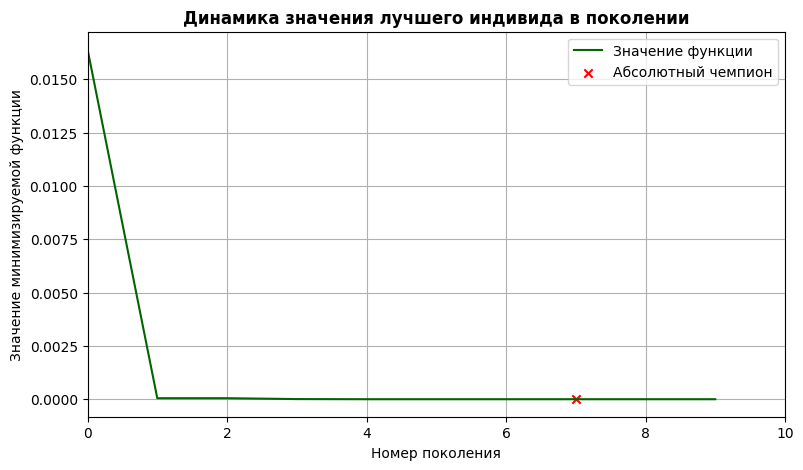

In [ ]:
p1 = pygmo.population(booth_function, size=pop_size, seed=current_seed)
p1 = few_evols(pygmo.sade, p1)
plot(booth_function, p1, number_of_evolutions)

In [ ]:
p1[4]

,Problem,Method,Pop_Size,Num_Geners,Num_Evoluts,Min_Coordinates,Function_Value
7,BoothOptim,pygmo.core.sade,100,10,10,"[1.0, 3.0]",[0.0]


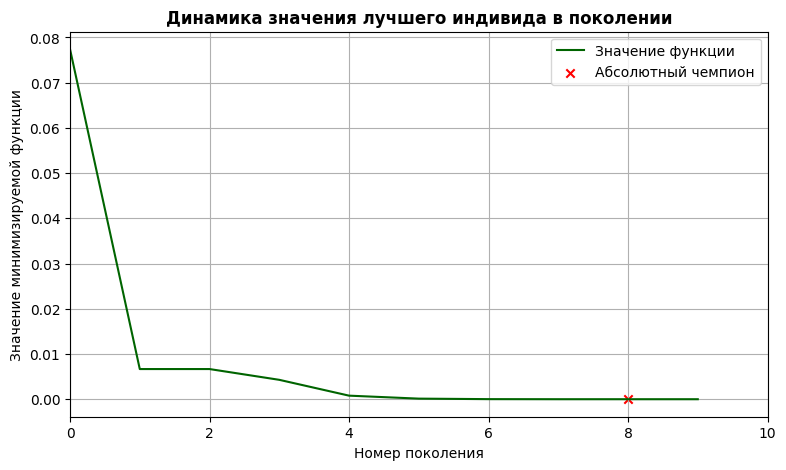

In [ ]:
p2 = pygmo.population(rosenbrock_function, size=pop_size, seed=current_seed)
p2 = few_evols(pygmo.sade, p2)
plot(rosenbrock_function, p2, number_of_evolutions)

In [ ]:
p2[4]

,Problem,Method,Pop_Size,Num_Geners,Num_Evoluts,Min_Coordinates,Function_Value
7,Rosenbrock,pygmo.core.sade,100,10,10,"[1.00006, 1.00012]",[0.0]


#### С помощью Grey Wolf Optimizer

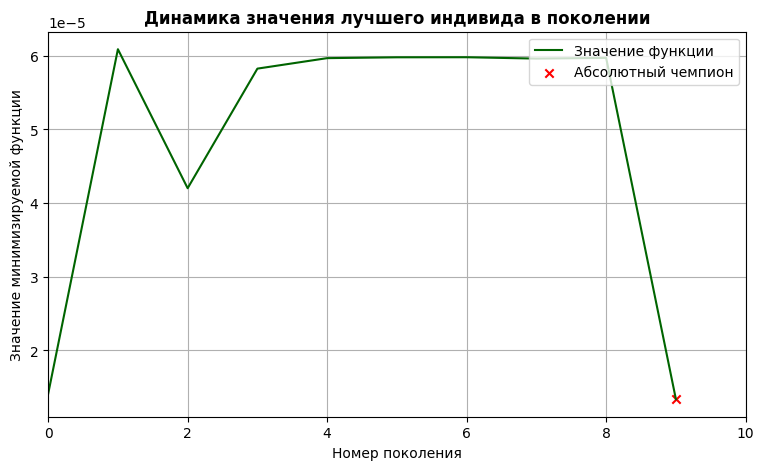

In [ ]:
p1 = pygmo.population(booth_function, size=pop_size, seed=current_seed)
p1 = few_evols(pygmo.gwo, p1)
plot(booth_function, p1, number_of_evolutions)

In [ ]:
p1[4]

,Problem,Method,Pop_Size,Num_Geners,Num_Evoluts,Min_Coordinates,Function_Value
7,BoothOptim,pygmo.core.gwo,100,10,10,"[0.99906, 2.99922]",[1e-05]


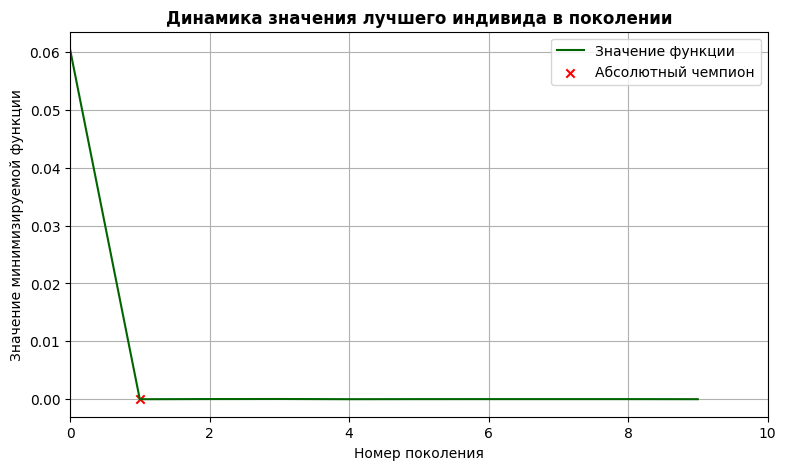

In [ ]:
p2 = pygmo.population(rosenbrock_function, size=pop_size, seed=current_seed)
p2 = few_evols(pygmo.gwo, p2)
plot(rosenbrock_function, p2, number_of_evolutions)

In [ ]:
p2[4]

,Problem,Method,Pop_Size,Num_Geners,Num_Evoluts,Min_Coordinates,Function_Value
7,Rosenbrock,pygmo.core.gwo,100,10,10,"[1.00051, 1.00095]",[0.0]
